In [1]:

# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
ipl_df = pd.read_csv('ipl_data.csv')
print(f"Dataset successfully Imported of Shape: {ipl_df.shape}")

Dataset successfully Imported of Shape: (76014, 15)


In [3]:
#Showing first 5 columns data
ipl_df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# Dataset information
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
# 
ipl_df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

In [6]:
# Datatypes of columns.
ipl_df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

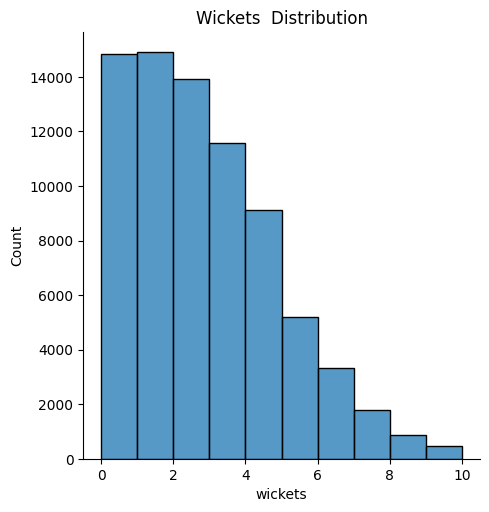

In [7]:
# Graph between wickets and the count of total runs from 2008-20217.
sns.displot(ipl_df['wickets'], kde =False, bins=10)
plt.title("Wickets  Distribution")

plt.show()

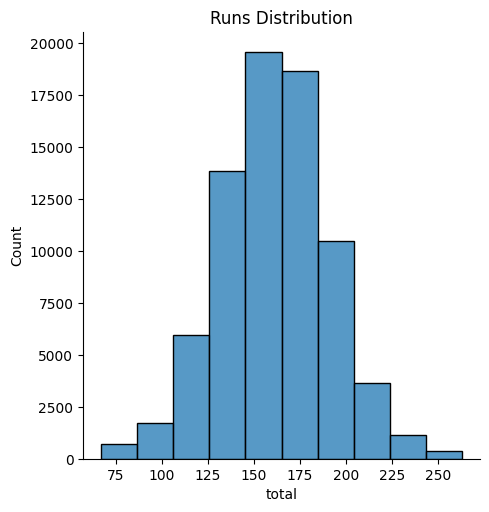

In [8]:
# Graph between total runs and the count of runs from 2008-2017.
# From this graph we will get that what is the range where most of the runs were made feom 2008-2017.
sns.displot(ipl_df['total'], kde = False, bins=10)
plt.title("Runs Distribution")

plt.show()

In [9]:
# Columns of the ipl dataset.
ipl_df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

Above, we can see that columns ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'] won't provide any relevant information for our model to train so we will drop these unnecessary columns

In [10]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


As many teams have been dropped from IPL, we'll only keep consistent teams in the dataset

In [11]:
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [12]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [13]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


<Axes: >

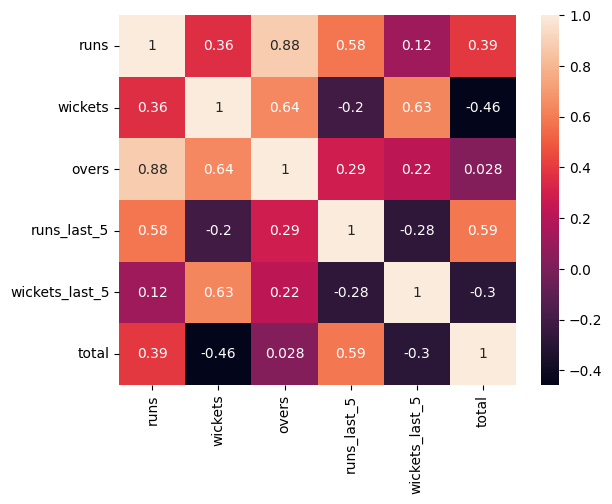

In [14]:
# Heatmap for feature selection .
numeric_df = ipl_df.select_dtypes(include=[float, int])

corr_matrix = numeric_df.corr()
sns.heatmap(data=corr_matrix, annot=True)

Performing Label Encoding

In [15]:
print(ipl_df.columns)

Index(['bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total'],
      dtype='object')


In [16]:
# It will give random numbers to bat_team, bowl_team .
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [17]:

from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [18]:
# Converting ipl dataset into array.
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))

In [19]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(ipl_df, columns=cols)

In [20]:
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


Preparing Train and Test Data

In [21]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [22]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


In [23]:
models= dict()

In [24]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor()
#Training the model
decisiontree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [25]:

# Evaluating the Model
train_score_tree = str(decisiontree.score(train_features, train_labels) * 100)
test_score_tree = str(decisiontree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["decisiontree"] = test_score_tree

Train Score : 99.99%
Test Score : 87.10%


In [26]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, decisiontree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, decisiontree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, decisiontree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 3.857766143106457
Mean Squared Error (MSE): 119.04624781849913
Root Mean Squared Error (RMSE): 10.9108316740063


In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [28]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 65.99%
Test Score : 65.64%


In [29]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.23336678625966
Mean Squared Error (MSE): 317.19331547649864
Root Mean Squared Error (RMSE): 17.809921826793587


In [30]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()
# Train Model
randomforest.fit(train_features, train_labels)

RandomForestRegressor()

In [31]:
# Evaluate Model
train_score_forest = str(randomforest.score(train_features, train_labels)*100)
test_score_forest = str(randomforest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["randomforest"] = test_score_forest

Train Score : 99.04%
Test Score : 93.28%


In [32]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, randomforest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, randomforest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, randomforest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 4.563006093362302
Mean Squared Error (MSE): 62.004147136607855
Root Mean Squared Error (RMSE): 7.874271213046186


In [33]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [34]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 57.47%
Test Score : 57.07%


In [35]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.877561103162934
Mean Squared Error (MSE): 396.24417697710186
Root Mean Squared Error (RMSE): 19.905882974063267


In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:

train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 88.64%
Test Score : 84.90%


In [38]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.448930282421582
Mean Squared Error (MSE): 139.34583927181237
Root Mean Squared Error (RMSE): 11.804483862999364


In [39]:

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)


KNeighborsRegressor()

In [40]:

train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 86.82%
Test Score : 77.43%


In [41]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 9.858289703315881
Mean Squared Error (MSE): 208.2908800797806
Root Mean Squared Error (RMSE): 14.43228603097169


Text(0.5, 1.0, 'Accuracy of different models')

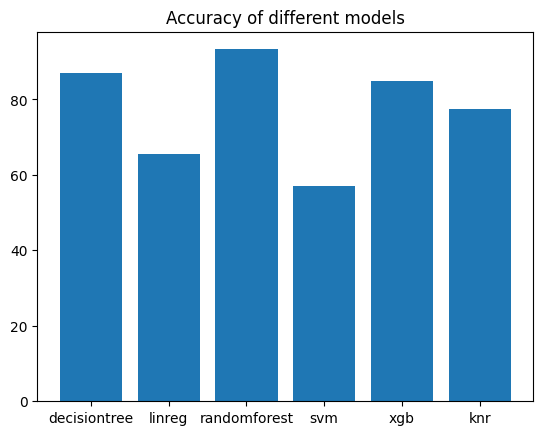

In [42]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)
plt.title("Accuracy of different models")

In [43]:
import numpy as np

def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model = randomforest):
    prediction_array = []
    
    # Batting Team
    teams = ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders',
             'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
    
    prediction_array += [1 if batting_team == team else 0 for team in teams]
    
    # Bowling Team
    prediction_array += [1 if bowling_team == team else 0 for team in teams]
    
    # Add match parameters
    prediction_array += [runs, wickets, overs, runs_last_5, wickets_last_5]
    
    # Convert to numpy array
    prediction_array = np.array([prediction_array])
    
    # Predict using the model
    pred = model.predict(prediction_array)
    
    return int(round(pred[0]))


In [44]:

score_list = []
actual_list = []

In [45]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')
score_list.append(score)
actual_list.append(147)

Predicted Score : 148 || Actual Score : 147


c:\Users\PALAK YADAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


TESTING OF THE MODEL WITH SOME MATCHES.

In [46]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 176')
score_list.append(score)
actual_list.append(176)

Predicted Score : 189 || Actual Score : 176


c:\Users\PALAK YADAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')
score_list.append(score)
actual_list.append(185)

Predicted Score : 188 || Actual Score : 185


c:\Users\PALAK YADAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [48]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')
score_list.append(score)
actual_list.append(172)

Predicted Score : 174 || Actual Score : 172


c:\Users\PALAK YADAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:

batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')
score_list.append(score)
actual_list.append(110)

Predicted Score : 106 || Actual Score : 110


c:\Users\PALAK YADAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [50]:

batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')
score_list.append(score)
actual_list.append(153)

Predicted Score : 148 || Actual Score : 153


c:\Users\PALAK YADAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [51]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')
score_list.append(score)
actual_list.append(146)

Predicted Score : 149 || Actual Score : 146


c:\Users\PALAK YADAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [52]:

print(score_list)          #........predicted score
print(actual_list)         #........actual score

[148, 189, 188, 174, 106, 148, 149]
[147, 176, 185, 172, 110, 153, 146]


GRAPH OF THE TESTES DONE ABOVE.


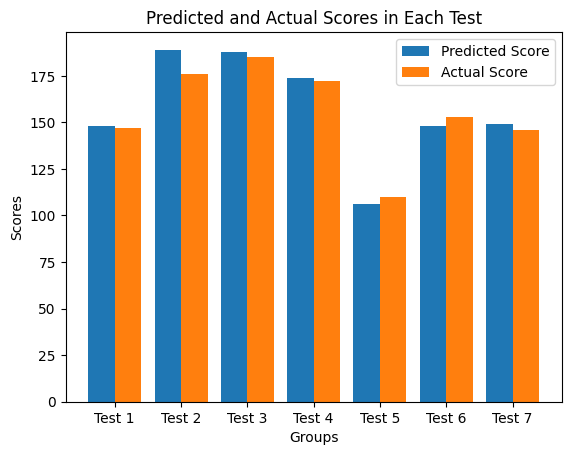

In [53]:
import numpy as np  
import matplotlib.pyplot as plt  

# Example data
X = ['Test 1','Test 2','Test 3','Test 4','Test 5','Test 6','Test 7']
X_axis = np.arange(len(X))  # Create an array of indices for X

plt.bar(X_axis - 0.2, score_list, 0.4, label='Predicted Score')  # Plot predicted scores
plt.bar(X_axis + 0.2, actual_list, 0.4, label='Actual Score')    # Plot actual scores

plt.xticks(X_axis, X)  # Set the x-axis ticks to be the test names
plt.xlabel("Groups") 
plt.ylabel("Scores") 
plt.title("Predicted and Actual Scores in Each Test") 
plt.legend() 
plt.show()

EXPORTING MODEL

In [54]:
import pickle 
filename = "ml_model.pkl"
pickle.dump(randomforest, open(filename, "wb"))         #dumping(writing) data in ml_model.pkl file